In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("C:\\Users\\Harish Kate\\Downloads\\cluster.csv")
data

,Visit_ID,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,100001,17,6,1,26,0,14833
1,100002,7,4,1,30,1,13189
2,100003,17,4,1,33,1,15459
3,100004,9,3,1,27,0,9857
4,100005,17,4,1,34,1,7985
...,...,...,...,...,...,...,...
995,100996,3,4,0,57,0,4685
996,100997,1,2,1,53,1,4285
997,100998,1,3,1,42,0,2131
998,100999,2,3,0,48,0,4904


In [4]:
data.isnull()

,Visit_ID,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [6]:
data.dtypes

Visit_ID                int64
Avg_Session_Duration    int64
Pages_Per_Session       int64
Channel                 int64
Age                     int64
Gender                  int64
Transaction             int64
dtype: object

In [11]:
data.drop(columns=['Visit_ID'], inplace = True)


KeyError: "['Visit_ID'] not found in axis"

In [12]:
data

,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,17,6,1,26,0,14833
1,7,4,1,30,1,13189
2,17,4,1,33,1,15459
3,9,3,1,27,0,9857
4,17,4,1,34,1,7985
...,...,...,...,...,...,...
995,3,4,0,57,0,4685
996,1,2,1,53,1,4285
997,1,3,1,42,0,2131
998,2,3,0,48,0,4904


In [14]:
cols = data.columns

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(data)

X = pd.DataFrame(X,columns=cols)

In [15]:
X

,Avg_Session_Duration,Pages_Per_Session,Channel,Age,Gender,Transaction
0,0.894737,1.0,1.0,0.200,0.0,0.857563
1,0.368421,0.6,1.0,0.300,1.0,0.747575
2,0.894737,0.6,1.0,0.375,1.0,0.899445
3,0.473684,0.4,1.0,0.225,0.0,0.524654
4,0.894737,0.6,1.0,0.400,1.0,0.399411
...,...,...,...,...,...,...
995,0.157895,0.6,0.0,0.975,0.0,0.178631
996,0.052632,0.2,1.0,0.875,1.0,0.151870
997,0.052632,0.4,1.0,0.600,0.0,0.007761
998,0.105263,0.4,0.0,0.750,0.0,0.193283


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state= 0)

kmeans.fit(X)

KMeans(n_clusters=7, random_state=0)

E:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


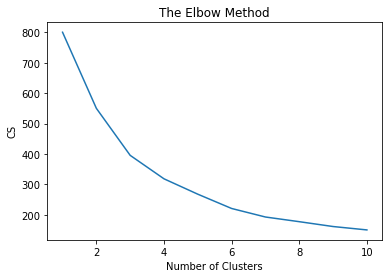

In [22]:
from sklearn.cluster import KMeans

cs= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CS')
plt.show()

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state= 0)

kmeans.fit(X)

KMeans(n_clusters=7, random_state=0)

In [27]:
kmeans.inertia_

193.14524203753177

In [28]:
Labels=kmeans.labels_

In [29]:
data['Labels']= Labels

In [30]:
data.to_csv('kmeans_clustering_output.csv')

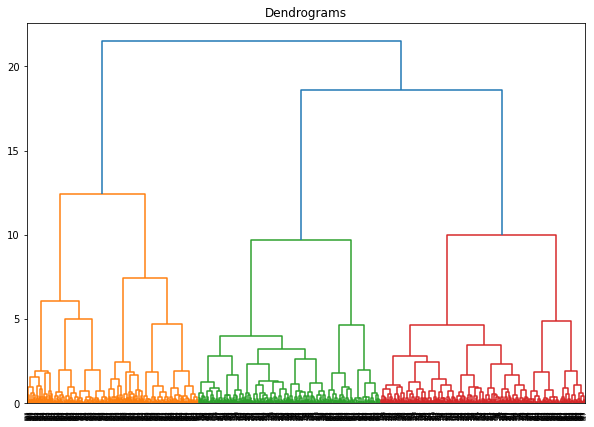

In [32]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [35]:
from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')

In [36]:
Labels=hierarchial.fit_predict(X)

In [37]:
Labels

array([0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4,
       0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 4, 0, 0, 0,
       4, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4,
       4, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,